In [ ]:
import pandas as pd

In [84]:
dataframe = pd.read_excel('/content/drive/MyDrive/RELATORIO - PAULO - ESTACIO (corrigido).xlsx')

In [ ]:
pip install matplotlib


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Ver as colunas do DataFrame
print("Colunas do DataFrame:")
print(dataframe.columns)

# Ver as primeiras 5 linhas do DataFrame
print("\nPrimeiras 5 linhas do DataFrame:")
print(dataframe.head())

# Obter informações sobre o DataFrame
print("\nInformações sobre o DataFrame:")
print(dataframe.info())



Colunas do DataFrame:
Index(['Data e hora', 'Status da venda', 'Data baixa', 'Forma pagamento',
       'Dia da semana', 'Turno', 'Codigo', 'Sexo', 'Tipo do Item', 'Grupo',
       'Produto/servico', 'Valor Unitario', 'Quantidade', 'Bruto', 'Desconto',
       'Liquido', 'Observacoes'],
      dtype='object')

Primeiras 5 linhas do DataFrame:
          Data e hora Status da venda           Data baixa  \
0 2023-01-02 11:40:23         Baixado  2023-01-02 00:00:00   
1 2023-01-02 12:50:08         Baixado  2023-01-02 00:00:00   
2 2023-01-02 12:50:08         Baixado  2023-01-02 00:00:00   
3 2023-01-02 12:50:08         Baixado  2023-01-02 00:00:00   
4 2023-01-02 13:46:01         Baixado  2023-01-02 00:00:00   

      Forma pagamento  Dia da semana               Turno  Codigo      Sexo  \
0                 PIX  Segunda-feira   Manha (6h as 12h)   908.0  Feminino   
1     GoldPay Credito  Segunda-feira  Tarde (12h as 18h)   644.0  Feminino   
2     GoldPay Credito  Segunda-feira  Tarde (12h as 

In [75]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(dataframe.columns)

# Verificar o intervalo de datas
print("\nIntervalo de datas:")
print(dataframe['Data e hora'].min(), "a", dataframe['Data e hora'].max())


Colunas do DataFrame:
Index(['Data e hora', 'Status da venda', 'Data baixa', 'Forma pagamento',
       'Dia da semana', 'Turno', 'Codigo', 'Sexo', 'Tipo do Item', 'Grupo',
       'Produto/servico', 'Valor Unitario', 'Quantidade', 'Bruto', 'Desconto',
       'Liquido', 'Observacoes'],
      dtype='object')

Intervalo de datas:
2023-01-02 11:40:23 a 2023-12-30 17:07:09


In [76]:
print(dataframe)


             Data e hora Status da venda           Data baixa  \
0    2023-01-02 11:40:23         Baixado  2023-01-02 00:00:00   
1    2023-01-02 12:50:08         Baixado  2023-01-02 00:00:00   
2    2023-01-02 12:50:08         Baixado  2023-01-02 00:00:00   
3    2023-01-02 12:50:08         Baixado  2023-01-02 00:00:00   
4    2023-01-02 13:46:01         Baixado  2023-01-02 00:00:00   
...                  ...             ...                  ...   
8370 2023-12-30 14:38:27         Baixado  2023-12-30 00:00:00   
8371 2023-12-30 14:38:56         Baixado  2024-01-02 00:00:00   
8372 2023-12-30 14:38:56         Baixado  2024-01-02 00:00:00   
8373 2023-12-30 15:10:43         Baixado  2024-01-02 00:00:00   
8374 2023-12-30 17:07:09         Baixado  2024-01-19 00:00:00   

               Forma pagamento  Dia da semana               Turno  Codigo  \
0                          PIX  Segunda-feira   Manha (6h as 12h)   908.0   
1              GoldPay Credito  Segunda-feira  Tarde (12h as 18h)

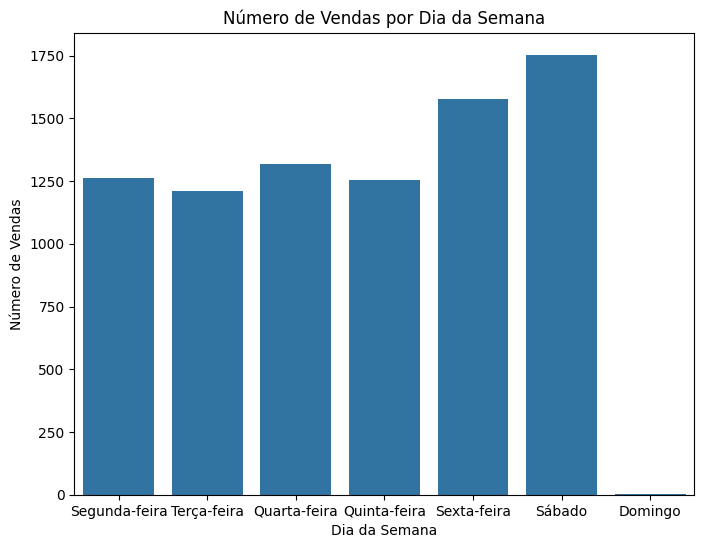

In [77]:
plt.figure(figsize=(8, 6))#Define o tamanho da figura por polegada
sns.countplot(data=dataframe, x='Dia da semana')#contar o número de ocorrências de cada dia da semana na coluna 'Dia da semana' do DataFrame df e plotar um gráfico de barras.
plt.title('Número de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Vendas')
plt.show()

In [79]:
# Agrupar os dados pelo produto/serviço e somar as quantidades
itens_mais_vendidos = dataframe.groupby('Produto/servico')['Quantidade'].sum().reset_index()

# Ordenar os itens por quantidade vendida em ordem decrescente
itens_mais_vendidos = itens_mais_vendidos.sort_values(by='Quantidade', ascending=False)

# Exibir os itens mais vendidos
print(itens_mais_vendidos.head(10))  # Verificar os 10 itens mais vendidos


                                       Produto/servico  Quantidade
374  Taxidog Barra Bali e adjacencias (ida, volta, ...      2401.0
146                                 Escovacao de Dente       557.0
375          Taxidog ate 10km (ida, volta, ida, volta)       419.0
74                     Banho Shih Tzu / Bulldog ingles       418.0
59                      Banho + Tosa completa Shih Tzu       413.0
73                                           Banho SRD       382.0
68                         Banho Bulldog Frances / Pug       325.0
371       Taxidog 10km a 15km (ida, volta, ida, volta)       310.0
60            Banho + Tosa completa Yorkshire / Maltes       309.0
196                       Limpinho e Cheiroso Shih Tzu       307.0


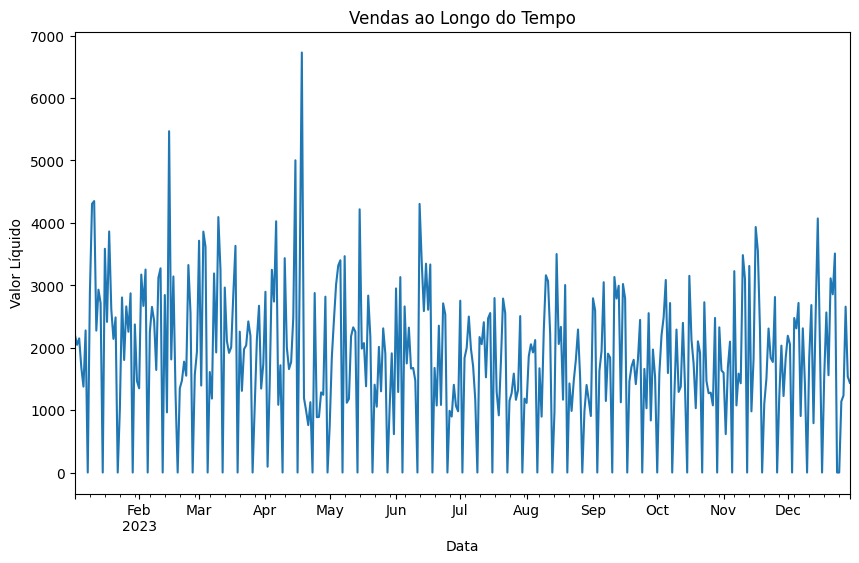

In [80]:
plt.figure(figsize=(10, 6))
dataframe['Data e hora'] = pd.to_datetime(dataframe['Data e hora'])  #Converte a coluna 'Data e hora' para o tipo de dados datetime usando a função pd.to_datetime(). Isso é necessário para que o pandas possa entender que essa coluna representa datas e horas.
dataframe.set_index('Data e hora', inplace=True) #Define a coluna 'Data e hora' como o índice do DataFrame df. Isso é feito usando set_index(). Isso é útil para operações de resampling, que é o próximo passo.
dataframe['Liquido'].resample('D').sum().plot() # Resample é uma operação que é usada para agrupar os dados por um determinado intervalo de tempo. Neste caso, estamos resampleando os dados diariamente ('D') e somando o valor líquido de cada dia. Em seguida, usamos plot() para criar um gráfico de linhas com os valores resultantes.
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor Líquido')
plt.show()

In [82]:
# Agrupar os dados pelo produto/serviço e somar as quantidades
itens_mais_vendidos = dataframe.groupby('Produto/servico')['Quantidade'].sum().reset_index()

# Ordenar os itens por quantidade vendida em ordem decrescente
itens_mais_vendidos = itens_mais_vendidos.sort_values(by='Quantidade', ascending=False)

# Exibir os itens mais vendidos
print(itens_mais_vendidos.head(10))  # Verificar os 10 itens mais vendidos

                                       Produto/servico  Quantidade
374  Taxidog Barra Bali e adjacencias (ida, volta, ...      2401.0
146                                 Escovacao de Dente       557.0
375          Taxidog ate 10km (ida, volta, ida, volta)       419.0
74                     Banho Shih Tzu / Bulldog ingles       418.0
59                      Banho + Tosa completa Shih Tzu       413.0
73                                           Banho SRD       382.0
68                         Banho Bulldog Frances / Pug       325.0
371       Taxidog 10km a 15km (ida, volta, ida, volta)       310.0
60            Banho + Tosa completa Yorkshire / Maltes       309.0
196                       Limpinho e Cheiroso Shih Tzu       307.0


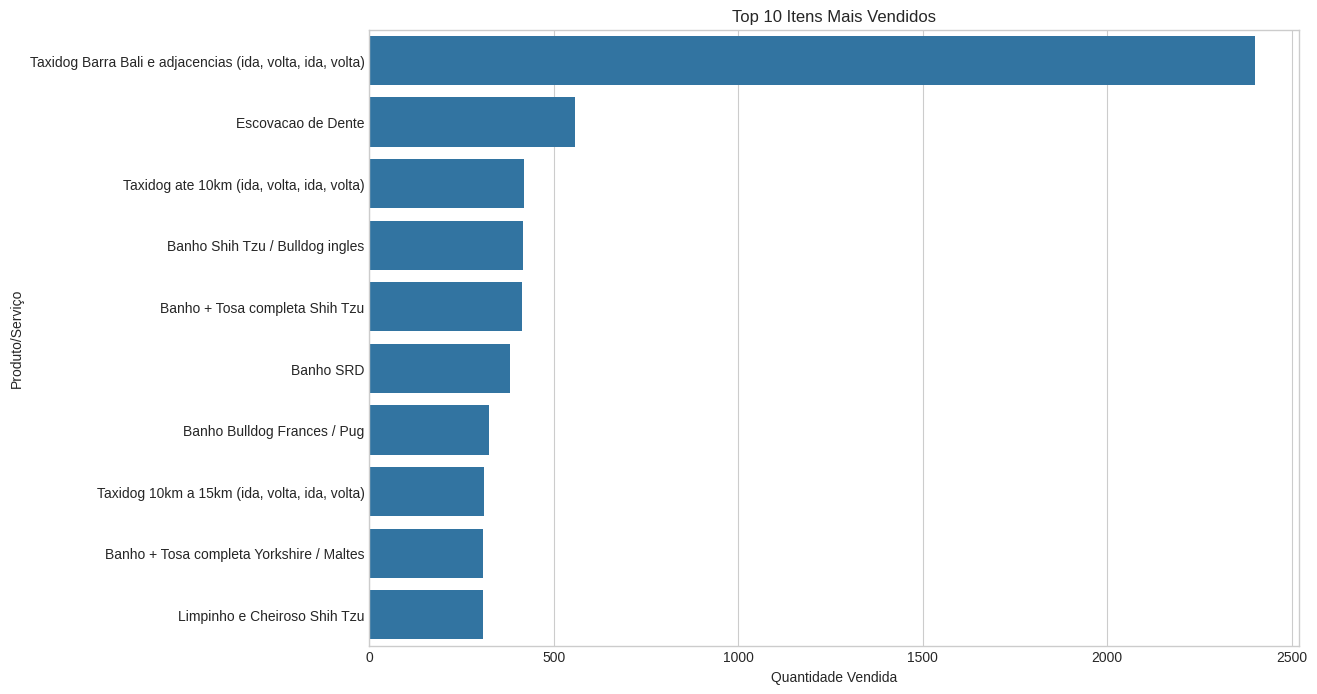

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=itens_mais_vendidos.head(10), x='Quantidade', y='Produto/servico')#Utiliza a função barplot do Seaborn para criar um gráfico de barras.
plt.title('Top 10 Itens Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto/Serviço')
plt.show()


In [89]:
#selecionando somente os horários da coluna de Data e hora
dataframe['Data e hora'] = pd.to_datetime(dataframe['Data e hora'])
dataframe['Horário'] = dataframe['Data e hora'].dt.hour

In [90]:
#selecionando as colunas para o gráfico com os valores totais
vendas_por_horario = dataframe.groupby('Horário') ['Bruto'].sum().reset_index()

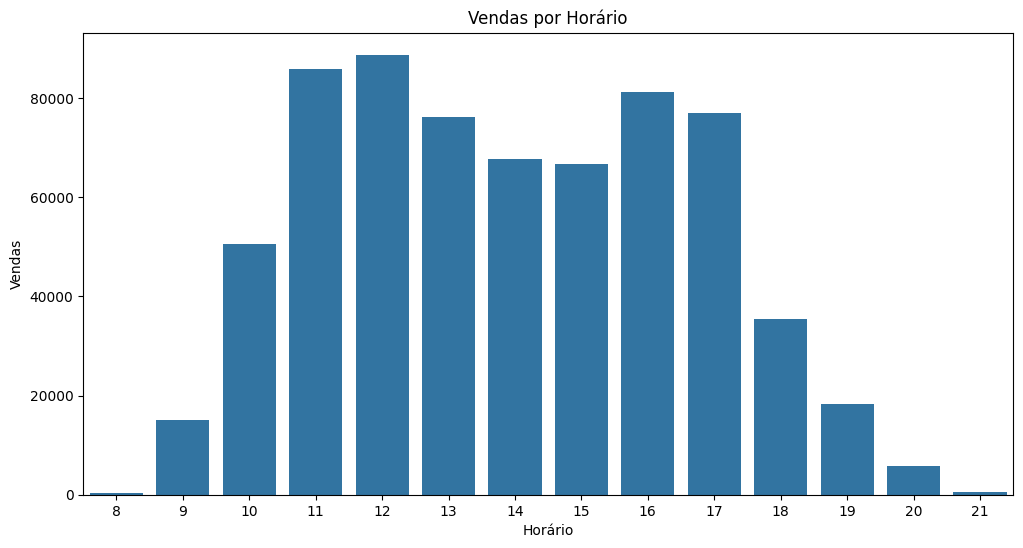

In [91]:
#gerar o gráfico de vendas por horário
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_horario, x='Horário', y='Bruto')
plt.title('Vendas por Horário')
plt.xlabel('Horário')
plt.ylabel('Vendas')
plt.show()

In [ ]:
#seleciona formas de pagamento
dataframe.groupby("Forma pagamento")


In [ ]:
#capta formas de pagamento
pagamento_contagem = dataframe['Forma pagamento'].value_counts()

In [ ]:
#limita os pagamentos residuais
limiar = 35
pagamentos_principais = pagamento_contagem[pagamento_contagem > limiar]
pagamento_outros = pagamento_contagem[pagamento_contagem <= limiar]

In [ ]:
#chama os pagamentos residuais de "Outros"
if len(pagamento_outros) > 0:
  pagamentos_principais['Outros'] = pagamento_outros.sum()

In [ ]:
#nomeação para facilitar o uso de "explode", que separa os itens do gráfico de pizza
num_wedges = len(pagamentos_principais)

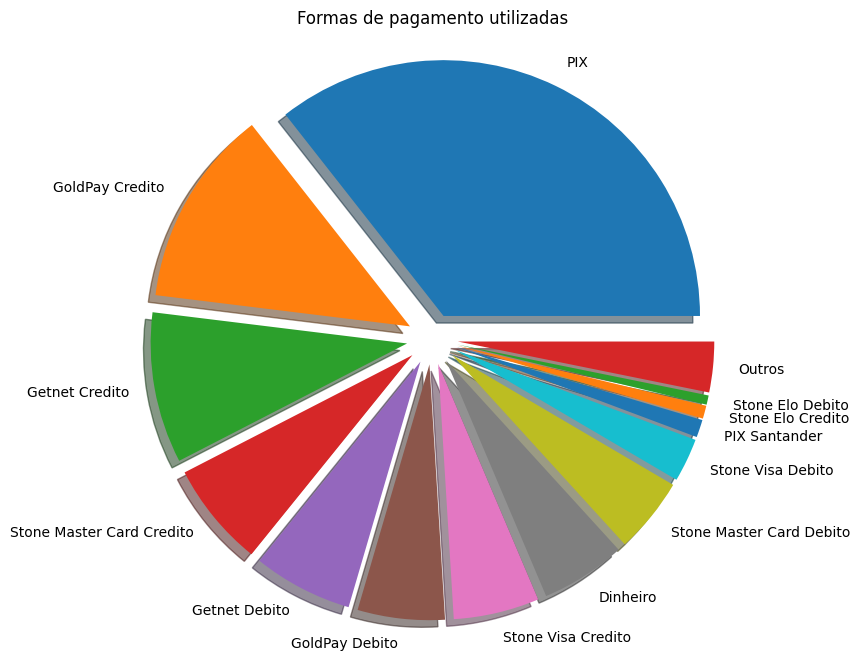

In [ ]:
#separa os itens do gráfico de pizza
explode = [0.1] * num_wedges
#gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(pagamentos_principais, labels=pagamentos_principais.index, explode=explode, shadow=True)
plt.title("Formas de pagamento utilizadas")
plt.axis('equal')
plt.show()